Example script which looks a linearly coupled beam as seen by two bpms

In [15]:
import numpy as np
import matplotlib.pyplot as plt

Independent Horizontal and Vertical, tilted bpms

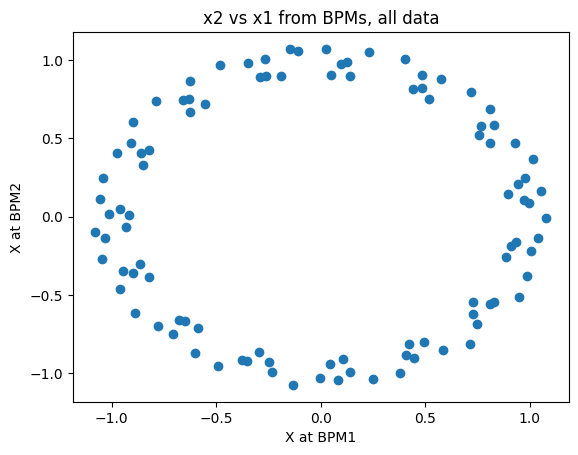

In [16]:
#particle oscillates independently in two planes
Qx = 6.7421
Qy = 6.8776
tnum = 10000
t = np.arange(tnum)
#x,y at first bpm
x1 = np.cos(2*np.pi*Qx*t)
y1 = np.sin(2*np.pi*Qy*t)
#x,y at second bpm
bpm21_phase = np.pi/2.0
x2 = np.cos(2*np.pi*Qx*t+bpm21_phase)
y2 = np.sin(2*np.pi*Qy*t+bpm21_phase)

#each bpm has a tilt which mixes the two degrees of freedom.
bpm1_tilt = 5.0*(np.pi/180.0)
bpm2_tilt = -15.0*(np.pi/180.0)
bpm_x1 = np.cos(bpm1_tilt)*x1 + np.sin(bpm1_tilt)*y1
bpm_y1 = -np.sin(bpm1_tilt)*x1 + np.cos(bpm1_tilt)*y1
bpm_x2 = np.cos(bpm1_tilt)*x2 + np.sin(bpm1_tilt)*y2
bpm_y2 = -np.sin(bpm1_tilt)*x2 + np.cos(bpm1_tilt)*y2

#plot x1 vs x2 as seen by bpms over 100 turns
plt.scatter(bpm_x1[0:100],bpm_x2[0:100])
plt.xlabel('X at BPM1')
plt.ylabel('X at BPM2')
plt.title('x2 vs x1 from BPMs, all data')
plt.savefig('day2_poincare_1.png', bbox_inches='tight')
plt.show()


Poincare Section

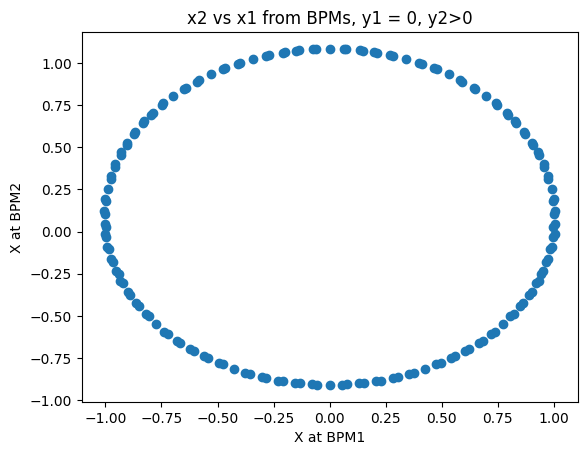

In [17]:
#plot x1 vs x2 as seen by bpms over 10000 turns, but only when y1 = 0, y2 > 0
poincare_y = np.logical_and( (np.abs(bpm_y1-0) <0.05), bpm_y2 > 0)
plt.scatter(bpm_x1[poincare_y],bpm_x2[poincare_y])
plt.xlabel('X at BPM1')
plt.ylabel('X at BPM2')
plt.title('x2 vs x1 from BPMs, y1 = 0, y2>0')
plt.savefig('day2_poincare_2.png', bbox_inches='tight')
plt.show()

Linearly Coupled Horizontal and Vertical, precise bpms

In [18]:
#tunes
Qx = 0.78
Qy = 0.80
#linear coupling resonance parameters
G = 0.05
lam = np.sqrt((Qx-Qy)**2 + G**2)
delt = np.abs(Qx-Qy)
Q = G/(lam+delt)
Qa = 1/(1+Q**2)
Qb = Q/(1+Q**2)
#linearly coupled tunes
Qp = 0.5*(Qx+Qy)+0.5*lam
Qm = 0.5*(Qx+Qy)-0.5*lam
cp = np.cos(2*np.pi*Qp)
sp = np.sin(2*np.pi*Qp)
cm = np.cos(2*np.pi*Qm)
sm = np.sin(2*np.pi*Qm)

Transfer matrix multiplication for linear couppling

In [19]:
U = np.matrix([[Qa, 0, Qb, 0], [0, Qa, 0, Qb], [-Qb, 0, Qa, 0], [0, -Qb, 0, Qa]])
R = np.matrix([[cp, sp, 0, 0], [-sp, cp, 0, 0], [0, 0, cm, sm], [0, 0, -sm, cm]])
M=np.matmul(R,U)
M=np.matmul(np.linalg.inv(U),M)

tnum = 10000
x = np.zeros((tnum,4))
#this vector represents x1, x2, y1, y2
x[0,:] = [1,0,0,0]
#calculate vector of tnum turns
for lp in range(1,tnum):
 x[lp,:] = np.dot(M,x[(lp-1),:])

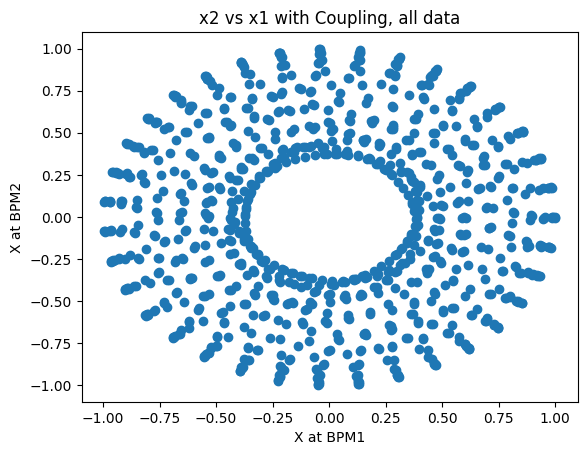

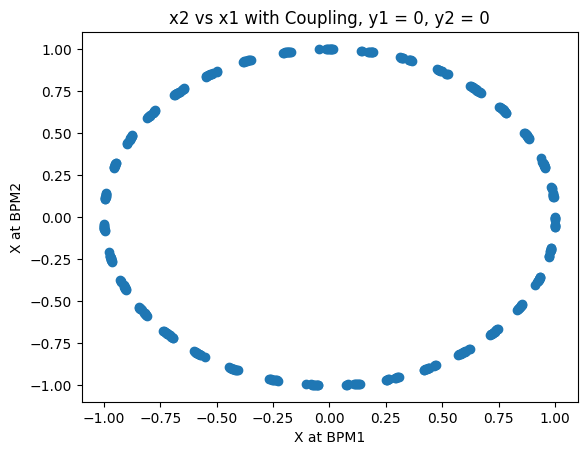

In [20]:
#plot x1 vs x2 as seen by bpms over 1000 turns
plt.scatter(x[0:1000,0],x[0:1000,1])
plt.xlabel('X at BPM1')
plt.ylabel('X at BPM2')
plt.title('x2 vs x1 with Coupling, all data')
plt.savefig('day2_poincare_3.png', bbox_inches='tight')
plt.show()

#plot x1 vs x2 as seen by bpms over 10000 turns, but only when y1 = 0, y2 = 0
poincare_y = np.logical_and( (np.abs(x[:,2]-0) <0.05), (np.abs(x[:,3]-0) <0.05))
plt.scatter(x[poincare_y,0],x[poincare_y,1])
plt.xlabel('X at BPM1')
plt.ylabel('X at BPM2')
plt.title('x2 vs x1 with Coupling, y1 = 0, y2 = 0')
plt.savefig('day2_poincare_4.png', bbox_inches='tight')
plt.show()